### Hypothesis Testing

In [17]:
from numpy.random import seed
from numpy.random import normal
from numpy import savetxt

### Create 2 Normal Distributions
* 1-> (mean=50,stev=1)
* 2-> (mean=60,stev=10)

In [18]:
mean=50   
stev=1

In [35]:
results = normal(mean, stev, 100000)
# save to ASCII file
savetxt('results1.csv', results)

In [22]:
results

array([ 48.89938082,  51.14472371,  50.90159072,  50.50249434,
        50.90085595,  49.31627214,  49.87710977,  49.06423057,
        49.73211192,  50.53035547,  49.30833925,  49.60324647,
        49.3128273 ,  49.15479436,  49.32875387,  49.9873354 ,
        48.88268965,  50.2344157 ,  51.65980218,  50.74204416,
        49.80816445,  49.11237104,  49.25284171,  51.6924546 ,
        50.05080775,  49.36300435,  50.19091548,  52.10025514,
        50.12015895,  50.61720311,  50.30017032,  49.64775015,
        48.8574818 ,  49.65065728,  49.79110577,  50.58662319,
        50.83898341,  50.93110208,  50.28558733,  50.88514116,
        49.24560206,  51.25286816,  50.51292982,  49.70190716,
        50.48851815,  49.92442829,  51.13162939,  51.51981682,
        52.18557541,  48.60350366,  48.55588619,  49.49553414,
        50.16003707,  50.87616892,  50.31563495,  47.97779878,
        49.69379599,  50.82797464,  50.23009474,  50.76201118,
        49.77767186,  49.79924193,  50.18656139,  50.41

In [36]:
from numpy.random import seed
from numpy.random import normal
from numpy import savetxt
# define underlying distribution of results
mean = 60
stev = 10
# generate samples from ideal distribution
seed(1)
results = normal(mean, stev, 100000)
# save to ASCII file
savetxt('results2.csv', results)

                   A              B
count  100000.000000  100000.000000
mean       60.036843      60.052530
std         9.970145       9.983343
min        18.188446      16.731127
25%        53.271645      53.319165
50%        60.016514      60.060004
75%        66.775784      66.747740
max       103.601870     101.681177


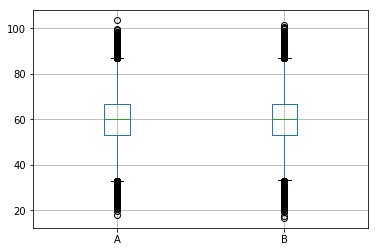

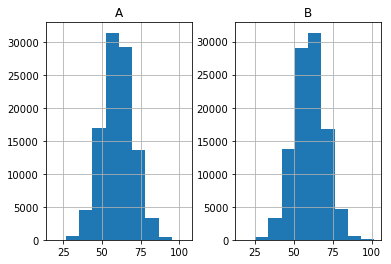

In [37]:
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot
# load results file
results = DataFrame()
results['A'] = read_csv('results1.csv', header=None).values[:, 0]
results['B'] = read_csv('results2.csv', header=None).values[:, 0]
# descriptive stats
print(results.describe())
# box and whisker plot
results.boxplot()
pyplot.show()
# histogram
results.hist()
pyplot.show()

### Are the distributions normal? 

In [38]:
from pandas import read_csv
from scipy.stats import normaltest
from matplotlib import pyplot
result1 = read_csv('results1.csv', header=None)
value, p = normaltest(result1.values[:,0])
print(value, p)
if p >= 0.05:
	print('It is likely that result1 is normal')
else:
	print('It is unlikely that result1 is normal')

2.1001911721 0.349904301542
It is likely that result1 is normal


In [39]:
from pandas import read_csv
from scipy.stats import normaltest
from matplotlib import pyplot
result2 = read_csv('results2.csv', header=None)
value, p = normaltest(result2.values[:,0])
print(value, p)
if p >= 0.05:
	print('It is likely that result2 is normal')
else:
	print('It is unlikely that result2 is normal')

1.74472348281 0.417963261527
It is likely that result2 is normal


### Are the data from same or different distributions?

In [40]:
from pandas import read_csv
from scipy.stats import ttest_ind
from matplotlib import pyplot
# load results1
result1 = read_csv('results1.csv', header=None)
values1 = result1.values[:,0]
# load results2
result2 = read_csv('results2.csv', header=None)
values2 = result2.values[:,0]
# calculate the significance
value, pvalue = ttest_ind(values1, values2, equal_var=False)
print(value, pvalue)
if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (accept H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

-0.351588844425 0.72514700296
Samples are likely drawn from the same distributions (accept H0)
